In [12]:
import os
from dotenv import load_dotenv

load_dotenv()
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [13]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="openai/gpt-oss-120b")

In [14]:
from typing import TypedDict

class AgentState(TypedDict):
    input: str
    output: str

In [15]:
def pre_model_hook(state: AgentState)-> AgentState:
    print("PRE-MODEL HOOK")
    print("Input",state["input"])
    
    state["input"] = f"You are a helpful assistant. \n {state['input']}"
    return state

In [16]:
def model_node(state: AgentState) -> AgentState:
    res = llm.invoke(state['input'])
    state['output'] = res.content
    return state

In [17]:
def post_model_hook(state: AgentState) -> AgentState:
    print('POST-MODEL HOOK')
    print("Output",state["output"])

    state["output"] = state["output"].strip()
    return state

In [18]:
from langgraph.graph import START, END, StateGraph

graph = StateGraph(AgentState)

graph.add_node('pre_hook',pre_model_hook)
graph.add_node('model',model_node)
graph.add_node('post_hook',post_model_hook)

graph.add_edge(START,'pre_hook')
graph.add_edge('pre_hook','model')
graph.add_edge('model','post_hook')
graph.add_edge('post_hook',END)

graph_builder = graph.compile()

res = graph_builder.invoke({
    "input": "Explain langgraph hooks in simple words"
})

PRE-MODEL HOOK
Input Explain langgraph hooks in simple words
POST-MODEL HOOK
Output ### What Are LangGraph Hooks?  
*(Think of them as “event listeners” for your graph‑based workflows.)*

---

#### 1. The big picture  
- **LangGraph** is a library for building **state‑driven, multi‑step AI workflows** (think chat bots, agents, pipelines, etc.).  
- A *graph* is a collection of **nodes** (functions that do something) and **edges** (rules that decide where to go next).  
- As the graph runs, it moves from node to node, updates a shared **state**, and eventually produces an output.

#### 2. Where do “hooks” fit in?  
A **hook** is simply a piece of code that the framework calls **automatically at a specific moment** during the graph’s execution.  
It lets you “tap into” the process without changing the core logic of the nodes themselves.

| Hook name | When it runs | Typical use‑case |
|-----------|--------------|-----------------|
| **on_start** | Right before the whole graph starts | Lo

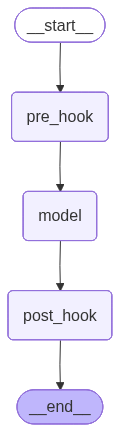

In [23]:
from IPython.display import Image, display, Markdown

code = graph_builder.get_graph().draw_mermaid()

display(
   Image(
       graph_builder.get_graph().draw_mermaid_png()
   )
)